In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1 = pd.read_csv('pdb_data_no_dups.csv')
df_1.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [ ]:
df_2 = pd.read_csv('pdb_data_seq.csv')
df_2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [ ]:
df = pd.merge(df_1, df_2, how='inner', on='structureId')
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24,DNA
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24,DNA
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [ ]:
# Drop Null values 
df= df[df.macromoleculeType_x=='Protein']
df.shape

(346325, 18)

In [ ]:
print(df.classification.isnull().sum())
print(df.sequence.isnull().sum())

1
3


In [ ]:
# Drop rows with missing labels
df = df[[type(c) == type('') for c in df.classification.values]]
df = df[[type(c) == type('') for c in df.sequence.values]]

In [ ]:
# Explore dataset 
df.classification.describe()

count        346321
unique         4468
top       HYDROLASE
freq          46336
Name: classification, dtype: object

In [ ]:
class_count = df.classification.value_counts()
print(class_count)

HYDROLASE                               46336
TRANSFERASE                             36424
OXIDOREDUCTASE                          34321
IMMUNE SYSTEM                           15615
LYASE                                   11682
                                        ...  
GLYCOGEN METABOLISM                         1
Viral protein, Transcription                1
MEMBRANE PROTEIN, RECEPTOR/Agonist          1
STRUCTURAL GENOMICS, GENE REGULATION        1
RECOMBINATION, REPLICATION                  1
Name: classification, Length: 4468, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


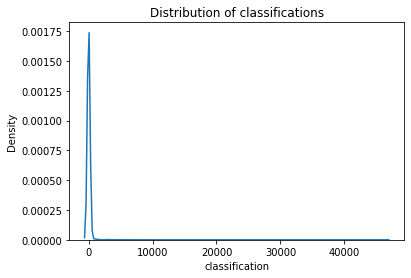

In [ ]:
plt.figure()
sns.distplot(class_count, hist=False)
plt.title('Distribution of classifications')
plt.show()

In [ ]:
# only gather classification for types where counts are over 1000
counts = Counter(df.classification)
df = df[df.classification.isin([key for key in counts if counts[key]>1000])]
df.shape

(278866, 18)

In [ ]:
cnt = Counter(df.classification)
# sort classes
sorted_classes = cnt.most_common()
classes = [c[0] for c in sorted_classes]
counts = [c[1] for c in sorted_classes]
print("at least " + str(counts[-1]) + " instances per class")


seqs = df.sequence.values
lengths = [len(s) for s in seqs]
print('mean length of seqs: ', sum(lengths)/len(lengths))

at least 1006 instances per class
mean length of seqs:  274.5884905295016


In [ ]:
seqs

array(['PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLYGQLPKFQDGDLTLYQSNTILRHLGRTLGLYGKDQQEAALVDMVNDGVEDLRCKYISLIYTNYEAGKDDYVKALPGQLKPFETLLSQNQGGKTFIVGDQISFADYNLLDLLLIHEVLAPGCLDAFPLLSAYVGRLSARPKLKAFLASPEYVNLPINGNGKQ',
       'PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLYGQLPKFQDGDLTLYQSNTILRHLGRTLGLYGKDQQEAALVDMVNDGVEDLRCKYISLIYTNYEAGKDDYVKALPGQLKPFETLLSQNQGGKTFIVGDQISFADYNLLDLLLIHEVLAPGCLDAFPLLSAYVGRLSARPKLKAFLASPEYVNLPINGNGKQ',
       'TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMVVEIPRWTNAKLEITKEETLNPIIQDTKKGKLRFVRNCFPHHGYIHNYGAFPQTWEDPNVSHPETKAVGDNEPIDVLEIGETIAYTGQVKQVKALGIMALLDEGETDWKVIAIDINDPLAPKLNDIEDVEKYFPGLLRATNEWFRIYKIPDGKPENQFAFSGEAKNKKYALDIIKETHDSWKQLIAGKSSDSKGIDLTNVTLPDTPTYSKAASDAIPPASLKADAPIDKSIDKWFFISGSV',
       ...,
       'SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTRPSPGPPPAEQLLSQARDFINQYYSSIKRSGSQAHEERLQEVEAEVASTGTYHLRESELVFGAKQAWRNAPRCVGRIQWGKLQVFDARDCSSAQEMFTYICNHIKYATNRGNLRSAITVFPQRAPGRGDFRIWNSQLVRYAGYRQQDGSVRGDPANVEITELCIQHGW

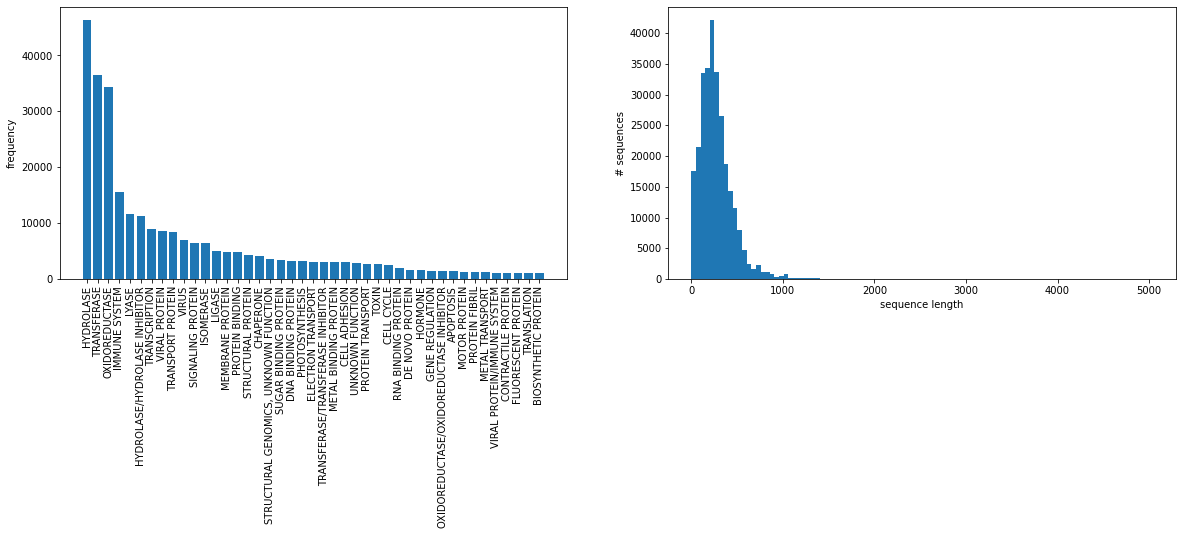

In [ ]:

fig, axarr = plt.subplots(1,2, figsize=(20,5))
axarr[0].bar(range(len(classes)),counts)
plt.sca(axarr[0])
plt.xticks(range(len(classes)), classes, rotation='vertical')
axarr[0].set_ylabel('frequency')

axarr[1].hist(lengths, bins=100)
axarr[1].set_xlabel('sequence length')
axarr[1].set_ylabel('# sequences')
plt.show()

Transform labels into one-hot encodes 

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(df.classification)

In [ ]:
# Tokenize and pad 
# Tokenizer translates sequence into a number 
# pad ensures every sequence has same length 

In [ ]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

max_length = 512 

# initiate Tokenizer 
tokenizer = Tokenizer(char_level=True) #tokenize in character level 
tokenizer.fit_on_texts(seqs)

X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=max_length)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

embedding_dim = 8

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 512, 8)            208       
_________________________________________________________________
conv1d (Conv1D)              (None, 512, 64)           3136      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 256, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 32)           6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 128, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
1743/1743 [==============================] - 62s 11ms/step - loss: 2.5006 - accuracy: 0.3311 - val_loss: 1.5408 - val_accuracy: 0.5990
Epoch 2/20
1743/1743 [==============================] - 18s 10ms/step - loss: 1.3460 - accuracy: 0.6465 - val_loss: 1.1818 - val_accuracy: 0.6947
Epoch 3/20
1743/1743 [==============================] - 18s 10ms/step - loss: 0.9955 - accuracy: 0.7348 - val_loss: 1.0490 - val_accuracy: 0.7326
Epoch 4/20
1743/1743 [==============================] - 18s 10ms/step - loss: 0.8053 - accuracy: 0.7816 - val_loss: 0.9620 - val_accuracy: 0.7606
Epoch 5/20
1743/1743 [==============================] - 18s 10ms/step - loss: 0.6899 - accuracy: 0.8104 - val_loss: 0.9053 - val_accuracy: 0.7825
Epoch 6/20
1743/1743 [==============================] - 18s 10ms/step - loss: 0.6040 - accuracy: 0.8318 - val_loss: 0.8640 - val_accuracy: 0.7983
Epoch 7/20
1743/1743 [==============================] - 18s 10ms/step - loss: 0.5366 - accuracy: 0.8483 - val_loss: 0.8465 -

In [ ]:
print(X_test[3])
print(y_test[3])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

train-acc = 0.9207591486920195
test-acc = 0.8492666834008678


In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

                                         precision    recall  f1-score   support

                              APOPTOSIS       0.80      0.77      0.79       280
                   BIOSYNTHETIC PROTEIN       0.81      0.77      0.79       198
                          CELL ADHESION       0.75      0.76      0.75       593
                             CELL CYCLE       0.78      0.72      0.75       502
                              CHAPERONE       0.88      0.87      0.88       854
                    CONTRACTILE PROTEIN       0.80      0.81      0.81       208
                        DE NOVO PROTEIN       0.80      0.82      0.81       335
                    DNA BINDING PROTEIN       0.79      0.76      0.78       653
                     ELECTRON TRANSPORT       0.73      0.69      0.71       606
                    FLUORESCENT PROTEIN       0.97      0.98      0.97       207
                        GENE REGULATION       0.87      0.78      0.82       280
                           

In [ ]:
import tensorflow as tf
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save('model.h5',)
print('saved model to disk')

saved model to disk


In [ ]:
def predict_class(seqs):

  max_length = 512 
  
  # initiate Tokenizer 
  tokenizer = Tokenizer(char_level=True) #tokenize in character level 
  tokenizer.fit_on_texts(seqs)


  X = tokenizer.texts_to_sequences([seqs])
  X = sequence.pad_sequences(X, maxlen=max_length)

  prediction = model.predict(X)
  prediction = lb.inverse_transform(prediction)
  print(prediction)

In [ ]:
predict_class('TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMVVEIPRWTNAKLEITKEETLNPIIQDTKKGKLRFVRNCFPHHGYIHNYGAFPQTWEDPNVSHPETKAVGDNEPIDVLEIGETIAYTGQVKQVKALGIMALLDEGETDWKVIAIDINDPLAPKLNDIEDVEKYFPGLLRATNEWFRIYKIPDGKPENQFAFSGEAKNKKYALDIIKETHDSWKQLIAGKSSDSKGIDLTNVTLPDTPTYSKAASDAIPPASLKADAPIDKSIDKWFFISGSV')

['OXIDOREDUCTASE']
